In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### so that we dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

Columns Description

url: contains the url of the restaurant in the zomato website

address=contains the address of the restaurant in Bengaluru

name: contains the name of the restaurant

online_order=whether online ordering is available in the restaurant or not

book_table=table book option available or not

rate=contains the overall rating of the restaurant out of 5

votes=contains total number of rating for the restaurant as of the above mentioned date

phone=contains the phone number of the restaurant

location=contains the neighborhood in which the restaurant is located

rest_type=restaurant type

dish_liked=dishes people liked in the restaurant

cuisines=food styles, separated by comma

approx_cost(for two people)=contains the approximate cost for meal for two people

reviews_list=list of tuples containing reviews for the restaurant, each tuple consists of two values,
rating and review by the customer
 
menu_item=contains list of menus available in the restaurant

listed_in(type)=type of meal

listed_in(city)contains the neighborhood in which the restaurant is listed

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Zomato-Analysis-main\Zomato-Analysis-main\zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
len(df['name'].unique())

8792

In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Getting all NAN features

In [8]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
# % of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [12]:
df.shape

(43942, 17)

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
def split(x):
    return x.split('/')[0]

In [15]:
df['rate'] = df['rate'].apply(split)

In [16]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [17]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
df.replace('NEW',0,inplace=True)

In [19]:
df.replace('-',0,inplace=True)

In [20]:
df['rate'] = df['rate'].astype(float)

Calculate average rating of each resturant

<Axes: xlabel='name'>

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 131 (\x83) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


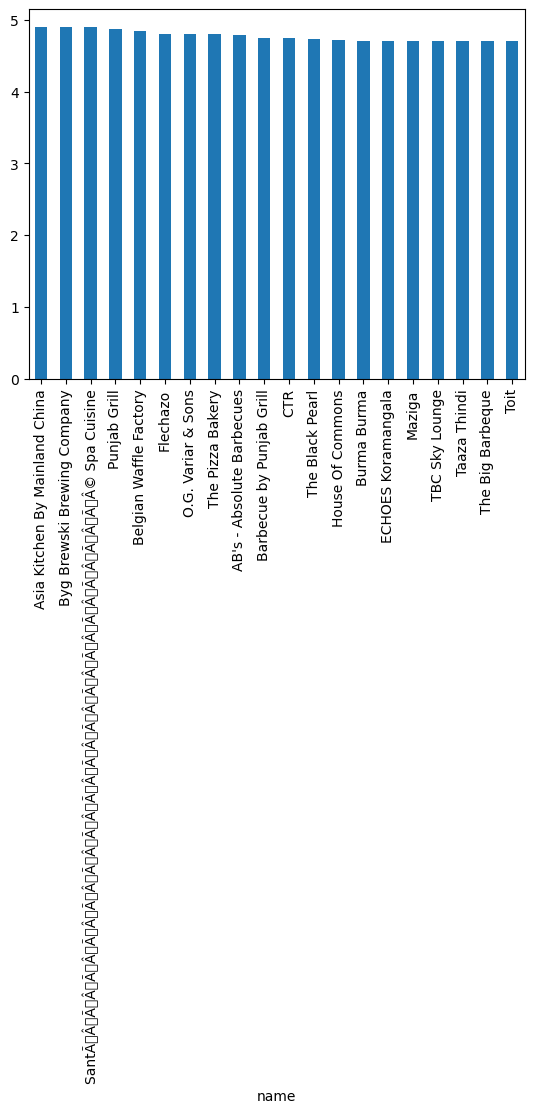

In [21]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

In [22]:
df_rate = df.groupby('name')['rate'].mean().to_frame()
df_rate = df_rate.reset_index()
df_rate.columns = ['resturant','rating']
df_rate.head(20)

,resturant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


In [23]:
df_rate.shape

(7162, 2)

Alternative is we create a list in which we have all returants and in another list, we have all ratings and then using zip we can create a dataframe

In [24]:
'''resturant = []
avg_rating = []
for key,name_df in df.groupby('name'):
    resturant.append(key)
    avg_rating.append(np.mean(name_df['rate']))''' 

"resturant = []\navg_rating = []\nfor key,name_df in df.groupby('name'):\n    resturant.append(key)\n    avg_rating.append(np.mean(name_df['rate']))"

In [25]:
'''df_rate = pd.DataFrame(zip(resturant,avg_rating))
df_rate.columns = ['returant','rating']
df_rate.head(20)'''

"df_rate = pd.DataFrame(zip(resturant,avg_rating))\ndf_rate.columns = ['returant','rating']\ndf_rate.head(20)"

Rating Distributition

C:\Users\HP\AppData\Local\Temp\ipykernel_39440\3673680488.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


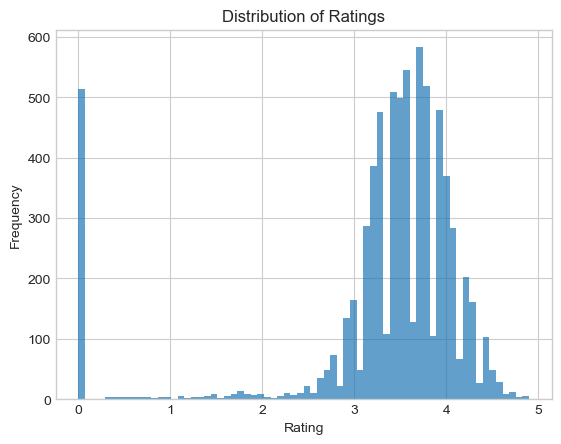

In [26]:
plt.style.use('seaborn-whitegrid')
plt.hist(df_rate['rating'],bins='auto',alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [27]:
'''sns.set_style(style='whitegrid')
sns.displot(df_rate['rating'])'''

"sns.set_style(style='whitegrid')\nsns.displot(df_rate['rating'])"

Almost more than 50 percent of the resturants has rating between 3 and 4.Resturants having rating more than 4.5 are very rare.

What are the top resturants chains in Bengaluru?

Text(0.5, 0, 'Number of outlets')

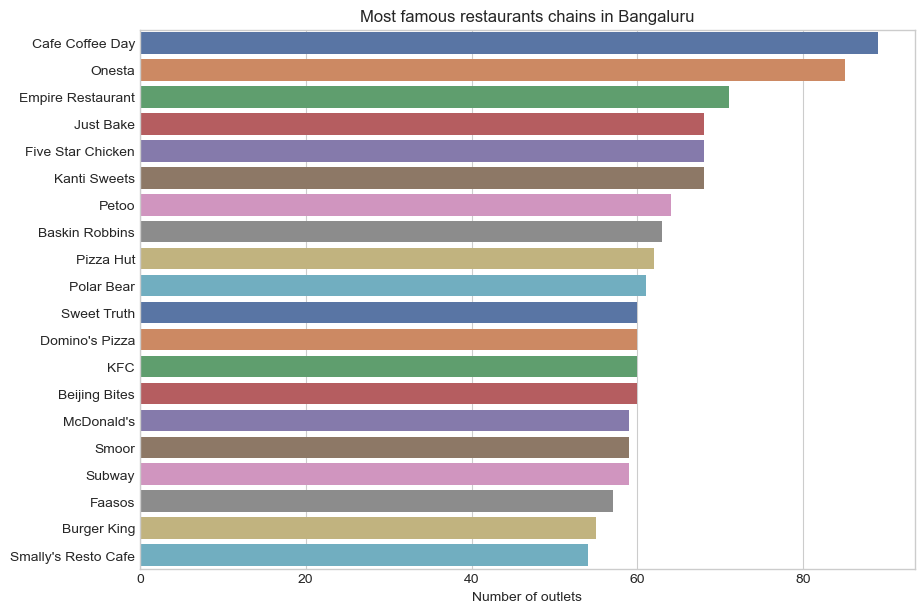

In [28]:
plt.figure(figsize = (10,7))
chains = df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel('Number of outlets')

How many of the resturants do not accept online order?

Text(0.5, 1.0, 'Online Order Status')

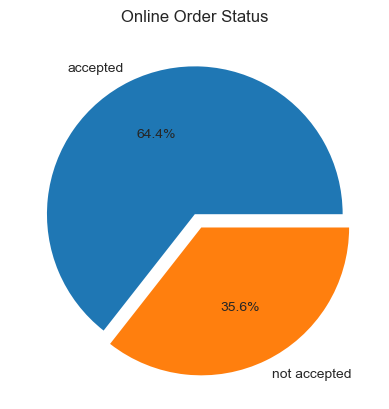

In [29]:
x = df['online_order'].value_counts()
labels = ['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%',labels=labels)
plt.title("Online Order Status")

What is the ratio b/w resturants that provide and do not provide table booking?

([<matplotlib.patches.Wedge at 0x2a3d4815de0>,
 [Text(-0.9856961240827233, 0.4882654513359477, 'Do Not Accept Bookings'),
  Text(1.0753048626356982, -0.5326532196392153, 'Accept Bookings')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.6272611698708239, -0.31071437812287556, '14.6%')])

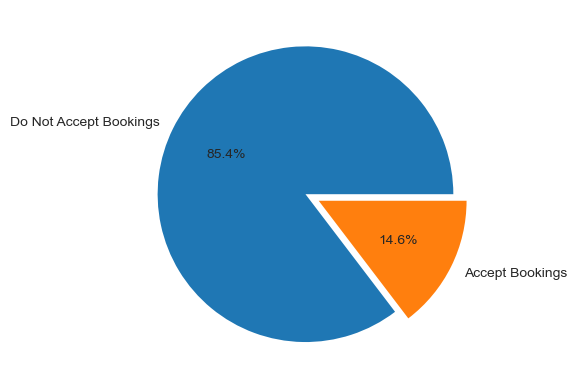

In [30]:
x = df['book_table'].value_counts()
labels =['Do Not Accept Bookings','Accept Bookings']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%',labels = labels)

How many types of resturants we have?

In [31]:
df['rest_type'].isna().sum()

151

In [32]:
df['rest_type'].dropna(inplace=True)

In [33]:
len(df['rest_type'].unique())

88

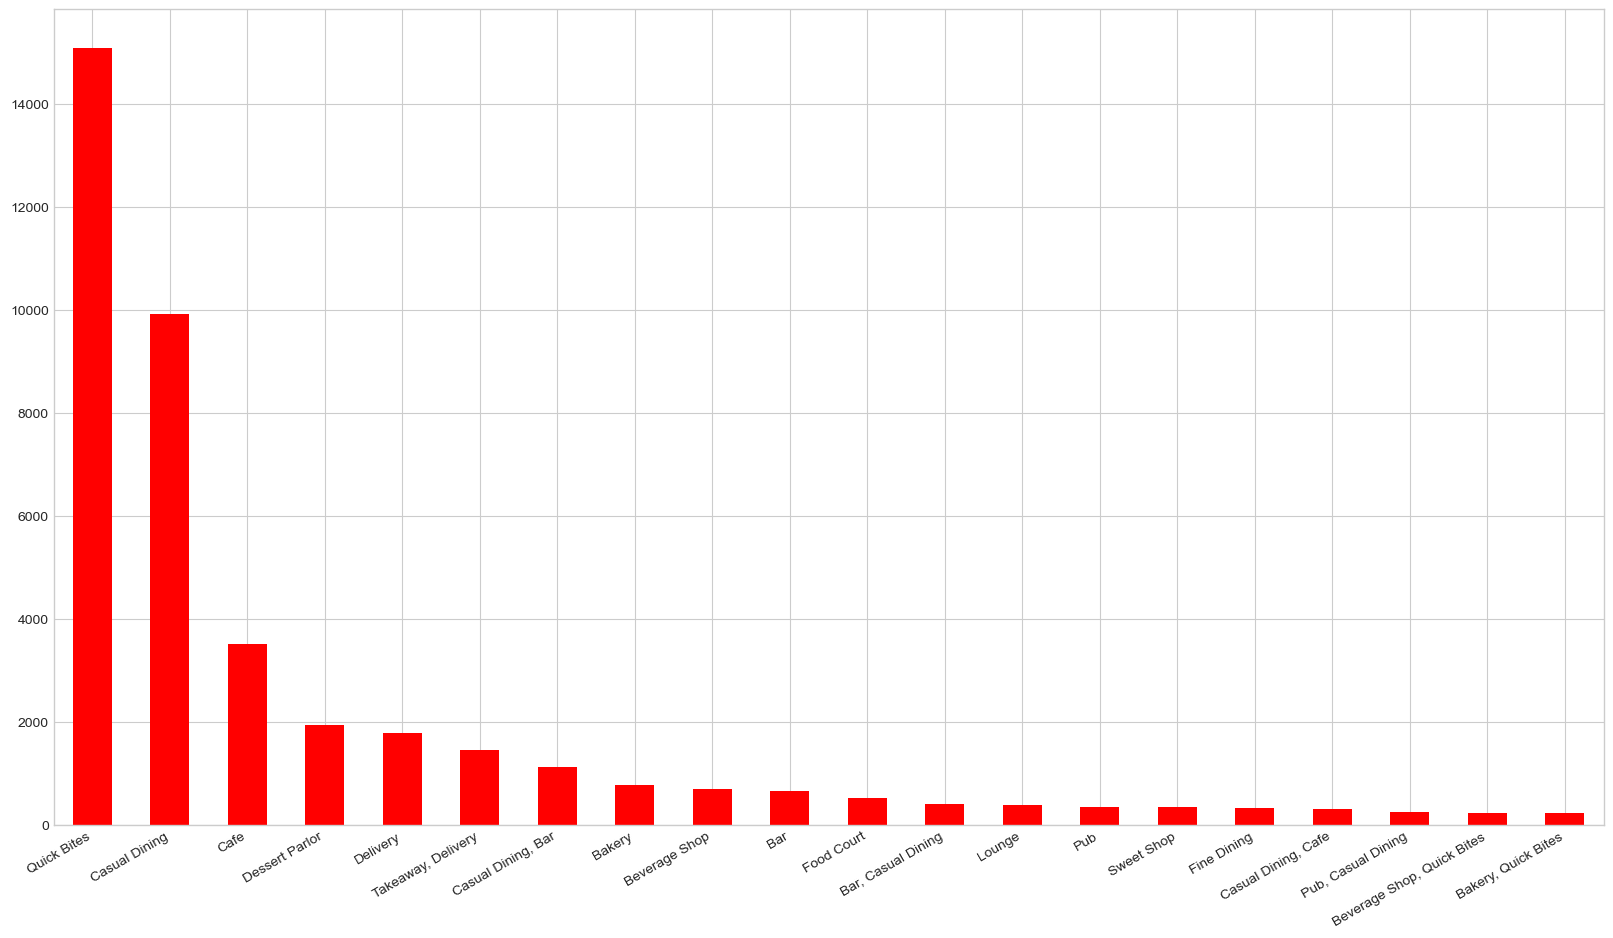

In [34]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()

At all, Banglore is known as the tech capital of India, people having busy and modern life will prefer Quick Bites.

We can observe the Quick Bites type resturant dominates.

Highest Voted Resturant

<Axes: xlabel='name'>

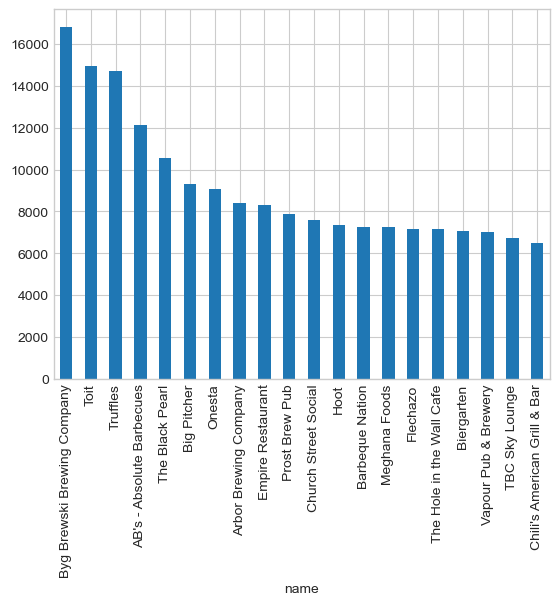

In [35]:
df.groupby('name')['votes'].max().nlargest(20).plot.bar()

Total resturants at different locations of Banglore

In [36]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [37]:
resturant = []
location = []
for key,location_df in df.groupby('location'):
    location.append(key)
    resturant.append(len(location_df['name'].unique()))

In [38]:
df_total = pd.DataFrame(zip(location,resturant))
df_total.columns = ['location','resturants']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='resturants').tail(10)

,resturants
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


<Axes: xlabel='location'>

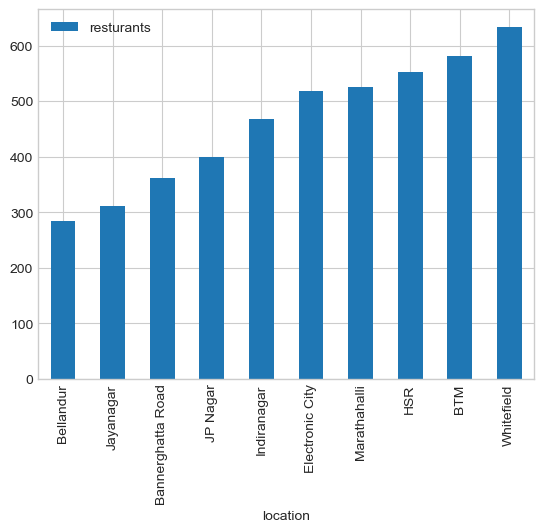

In [39]:
df_total.sort_values(by='resturants').tail(10).plot.bar()

Different Types of Resturants

In [40]:
#data is represented in the form of percentage
(df['rest_type'].value_counts()/len(df))*100

Quick Bites                   34.302035
Casual Dining                 22.582040
Cafe                           8.026489
Dessert Parlor                 4.412635
Delivery                       4.075827
                                ...    
Bakery, Food Court             0.004551
Food Court, Beverage Shop      0.004551
Dessert Parlor, Food Court     0.004551
Dessert Parlor, Kiosk          0.004551
Quick Bites, Kiosk             0.002276
Name: rest_type, Length: 87, dtype: float64

Total number of variety of Resturants i.e North Indian, South Indian

Text(0.5, 1.0, 'Most popular cuisines of Banglore')

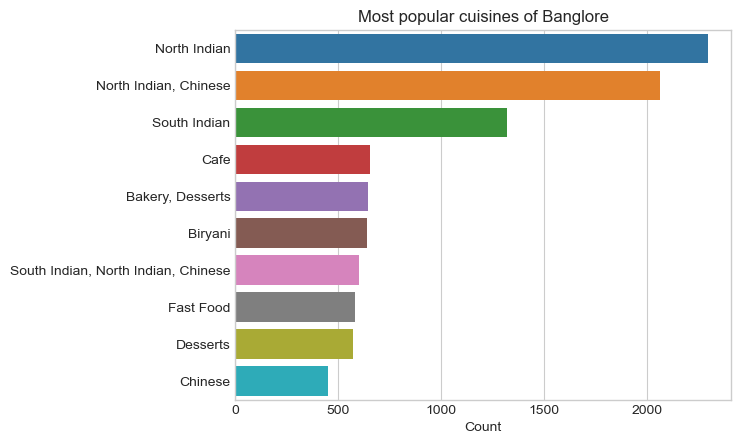

In [41]:
cuisines = df['cuisines'].value_counts()[:10]
sns.barplot(x = cuisines,y = cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Banglore")

We can observe that North Indian, Chinese, South Indian and Biryani are most common

Analyse approx cost for 2 people

In [42]:
len(df['approx_cost(for two people)'].value_counts())

66

In [43]:
df['approx_cost(for two people)'].isna().sum()

252

In [44]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [45]:
df['approx_cost(for two people)'].isna().sum()

0

In [46]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [47]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [48]:
df[~df['approx_cost(for two people)'].apply(is_float)]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
67,https://www.zomato.com/gustoesbeerhouse?contex...,"10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...",Gustoes Beer House,No,No,4.1,868,080 49653521,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...","1,200","[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Delivery,Banashankari
119,https://www.zomato.com/bangalore/k27-the-pub-b...,"27, 27th Cross, 2nd Stage, Banashankari, Banga...",K27 - The Pub,No,No,3.1,30,+91 9980097472,Banashankari,Bar,NaN,"Chinese, North Indian","1,000","[('Rated 4.0', ""RATED\n Convenient and Averag...",[],Delivery,Banashankari
166,https://www.zomato.com/bangalore/patio-805-jay...,"805, Ground Floor, 35C Cross, 9th Main, 4th Bl...",Patio 805,Yes,Yes,4.1,364,+91 8884999805,Jayanagar,Casual Dining,"Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...","Thai, Vietnamese, Asian, Chinese","1,200","[('Rated 4.0', ""RATED\n The number of good re...",[],Delivery,Banashankari
207,https://www.zomato.com/bangalore/chutney-chang...,"Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...",Chutney Chang,Yes,Yes,4.1,2339,080 22443007\r\n+91 9901967373,Jayanagar,Casual Dining,"Veg Momos, Brownie Chocolate, Palak Chaat, Mut...","North Indian, Chinese, BBQ","1,500","[('Rated 4.0', 'RATED\n Great place for team ...",[],Delivery,Banashankari
217,https://www.zomato.com/bangalore/toscano-jayan...,"359/38,Next to Fabindia, 7th Cross, 1st Block,...",Toscano,Yes,Yes,4.3,1129,080 41558423\r\n+91 7619320074,Jayanagar,Casual Dining,"Pizza, Pasta, Salads, Calamari, Ravioli, Pumpk...","Italian, Salad","1,300","[('Rated 4.0', 'RATED\n Saturday Night Dinner...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [49]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [50]:
df['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [51]:
type(df['approx_cost(for two people)'][0])

str

In [52]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [53]:
df['approx_cost(for two people)'].astype(int)

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: int32

Is there any difference between votes of resturants accepting and not accepting online orders

<Axes: xlabel='online_order', ylabel='votes'>

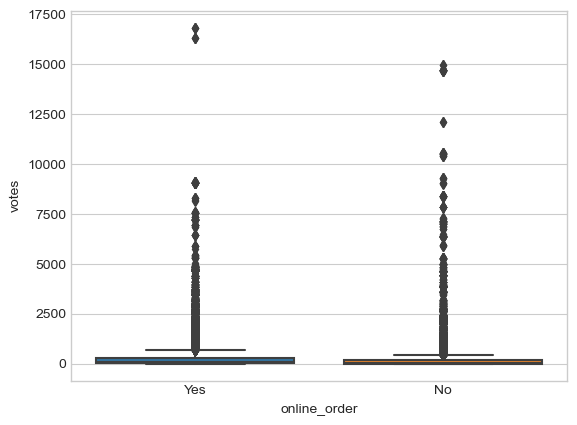

In [54]:
sns.boxplot(x='online_order',y='votes',data=df)

Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.

Is there any difference b/w price of restaurants accepting and not accepting online orders?

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

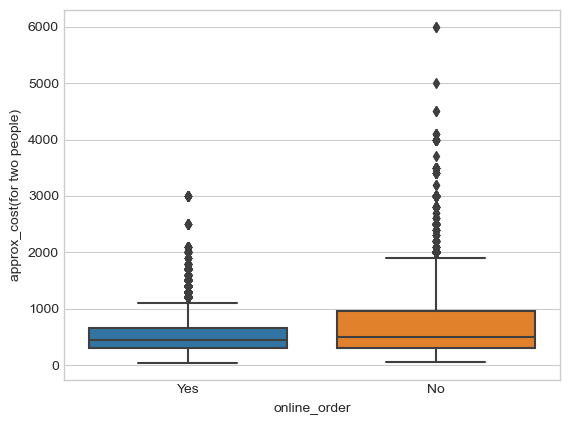

In [55]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders

Cheapest Rate for 2 people

In [56]:
df['approx_cost(for two people)'].min()

40

Most costly for two People

In [57]:
df['approx_cost(for two people)'].max()

6000

In [58]:
df[df['approx_cost(for two people)'] == 6000]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
19139,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,080 30571234\r\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
45618,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,080 30571234\n080 30571540,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Old Airport Road


In [59]:
df[df['approx_cost(for two people)'] == 6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

Distribution of cost for two people

C:\Users\HP\AppData\Local\Temp\ipykernel_39440\1130735022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['approx_cost(for two people)'])


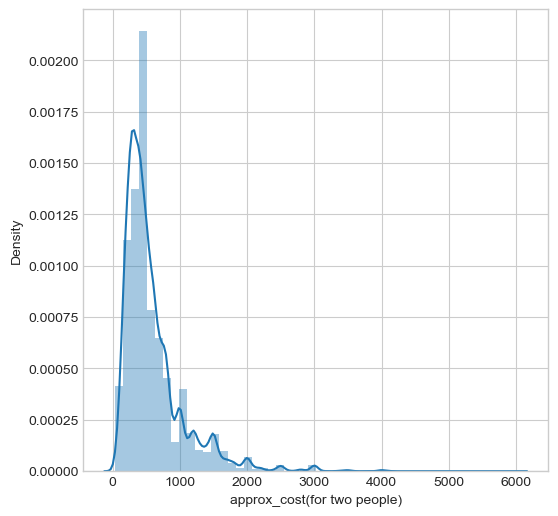

In [60]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

Most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious

Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant

In [61]:
df[df['approx_cost(for two people)']==6000].loc[:,('name','cuisines','dish_liked')]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [62]:
df[df['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [63]:
data = df.copy()

In [64]:
data.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)      int32
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [65]:
data.set_index('name',inplace=True)

Top 10 Most Expensive restaurant with approx cost for 2 people

<Axes: xlabel='name'>

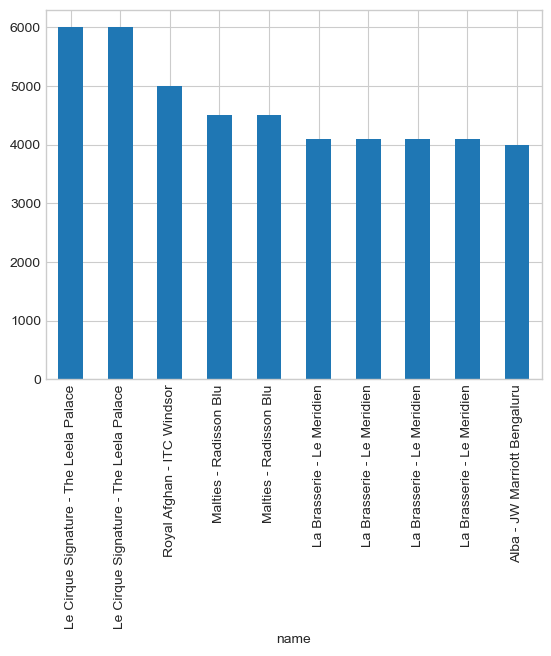

In [66]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

Top 10 Cheapest restaurant with approx cost for 2 people

<Axes: xlabel='name'>

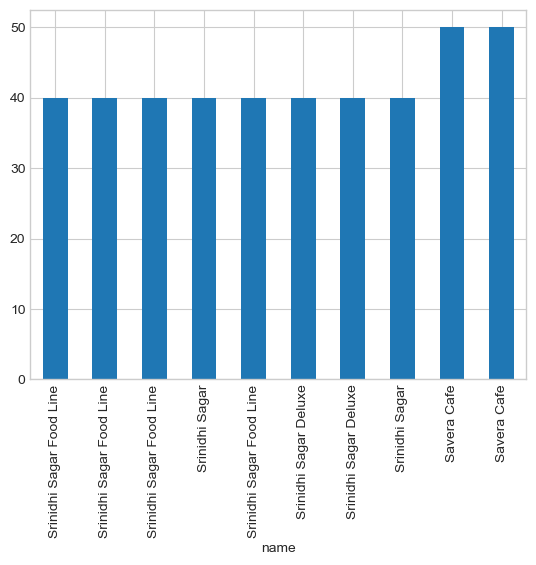

In [67]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

Top 10 Cheapest restaurant location wise with approx cost for 2 people 

In [69]:
data['approx_cost(for two people)'].nsmallest(10)

name
Srinidhi Sagar Food Line    40
Srinidhi Sagar Food Line    40
Srinidhi Sagar Food Line    40
Srinidhi Sagar              40
Srinidhi Sagar Food Line    40
Srinidhi Sagar Deluxe       40
Srinidhi Sagar Deluxe       40
Srinidhi Sagar              40
Savera Cafe                 50
Savera Cafe                 50
Name: approx_cost(for two people), dtype: int32

All the restautant that are below than 500(budget hotel)

In [70]:
data[data['approx_cost(for two people)']<500]

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Caf-Eleven,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Banashankari,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
T3H Cafe,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
360 Atoms Restaurant And Cafe,https://www.zomato.com/bangalore/360-atoms-res...,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",Yes,No,3.1,13,+91 9880594520,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",[],Cafes,Banashankari
The Vintage Cafe,https://www.zomato.com/bangalore/the-vintage-c...,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",Yes,No,3.0,62,+91 9880016665\r\n+91 8217311687,Banashankari,Cafe,"Burgers, Caramel Milkshake, Iced Coffee, Iced Tea","Cafe, French, North Indian",400,"[('Rated 2.0', ""RATED\n This is a tiny cafÃ\...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venice Kerala Restaurant,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Brookefield,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
Thai & Chinese Fast Food,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
The Crunch,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Brookefield,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [76]:
df_budget=data[data['approx_cost(for two people)']<500][['approx_cost(for two people)']]
df_budget = df_budget.reset_index()
df_budget.head()

,name,approx_cost(for two people)
0,Addhuri Udupi Bhojana,300
1,Caf-Eleven,450
2,T3H Cafe,300
3,360 Atoms Restaurant And Cafe,400
4,The Vintage Cafe,400


<Axes: >

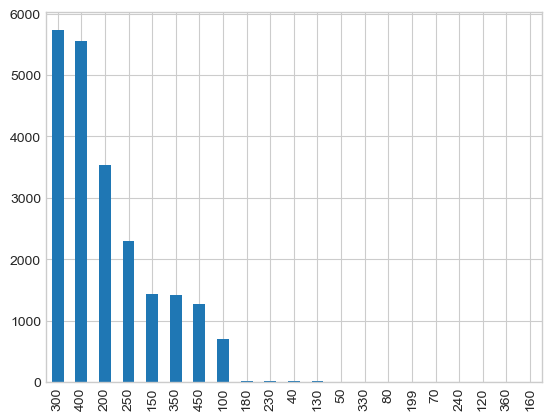

In [77]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar()

We can conclude that 300 and 400 cost dishes are maximum in count

Restaurants that have better rating >4 and that are under budget too

In [78]:
data.head(1)

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Jalsa,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [83]:
df[(df['rate']>4)&(df['approx_cost(for two people)']<=500)].shape

(2436, 17)

In [86]:
df_new = df[(df['rate']>4)&(df['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

372

Total such various affordable hotels at different location

In [88]:
location = []
total = []
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [89]:
len(location)

60

In [90]:
len(total)

60

In [91]:
location_df = pd.DataFrame(zip(location,total))
location_df.columns = ['location','resturant']
location_df.set_index('location',inplace=True)

In [92]:
location_df.head()

,resturant
location,
BTM,28
Banashankari,16
Banaswadi,1
Bannerghatta Road,9
Basavanagudi,24


Text(0, 0.5, 'Total Resturants')

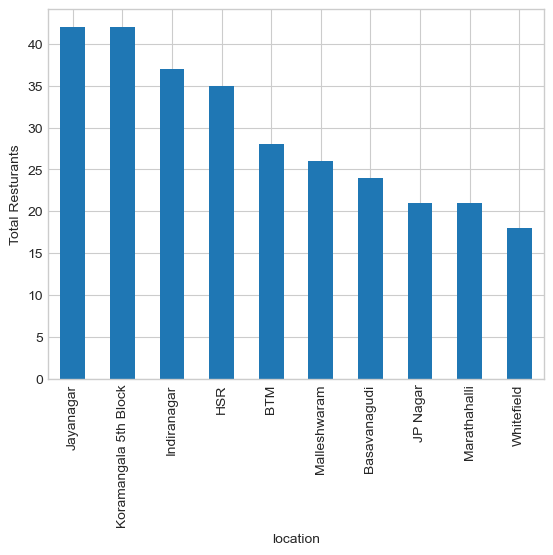

In [94]:
location_df['resturant'].nlargest(10).plot.bar()
plt.ylabel('Total Resturants')

Finding Best budget Restaurants in any location

In [103]:
def return_budget(location,resturant):
    budget = df[(df['approx_cost(for two people)']<=400)&(df['rest_type']==resturant)&(df['location']==location)&(df['rate']>4)]
    return(budget['name'].unique())

In [104]:
return_budget('BTM','Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

Which are the foodie areas?

<Axes: xlabel='location'>

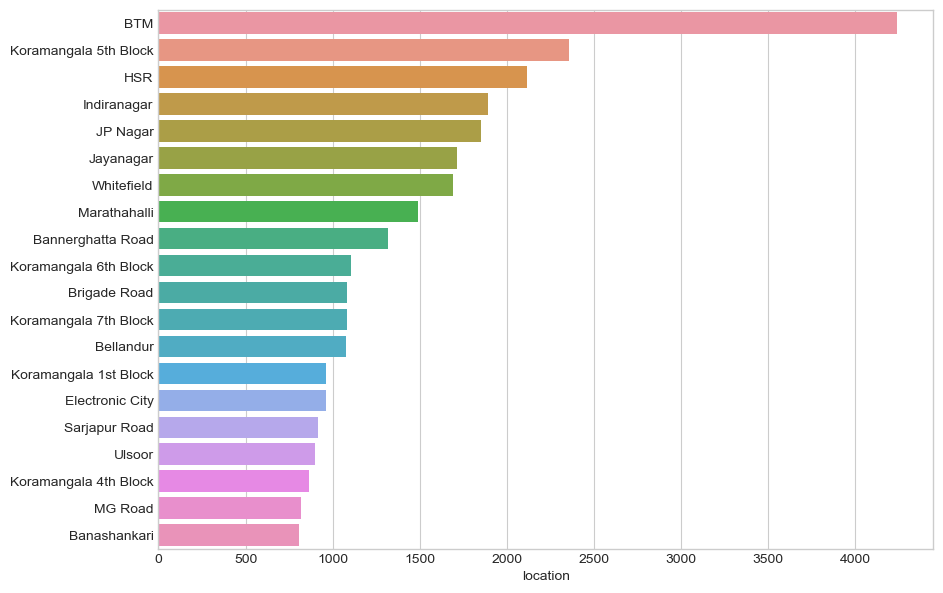

In [106]:
plt.figure(figsize=(10,7))
Resturants_location = df['location'].value_counts()[:20]
sns.barplot(x=Resturants_location,y=Resturants_location.index)

We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
BTM dominates the section by having more than 5000 restaurants.